STEP 1 — INSTALL DEPENDENCIES

In [ ]:
!pip install pyzbar
!apt-get install -y libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


STEP 2 — IMPORTS + CAMERA FUNCTION

In [ ]:
from google.colab import output
from google.colab.output import eval_js
from IPython.display import Javascript
import numpy as np
import cv2
from PIL import Image
import io, base64
from pyzbar.pyzbar import decode
import requests
import matplotlib.pyplot as plt

# ---- CAMERA FUNCTION ----
def take_photo():
    js = """
    async function takePhoto() {
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);

      video.srcObject = stream;
      await video.play();

      await new Promise(resolve => requestAnimationFrame(resolve));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      video.remove();

      return canvas.toDataURL('image/png');
    }
    takePhoto();
    """
    data = eval_js(js)
    image_bytes = base64.b64decode(data.split(",")[1])
    img = Image.open(io.BytesIO(image_bytes))
    return np.array(img)

STEP 3 — BARCODE PRODUCT API

In [ ]:
def get_product_info(barcode_number):
    url = f"https://world.openfoodfacts.org/api/v0/product/{barcode_number}.json"
    try:
        response = requests.get(url)
        data = response.json()

        if data["status"] == 1:
            product = data["product"]
            return {
                "name": product.get("product_name", "Unknown"),
                "brand": product.get("brands", "Unknown"),
                "categories": product.get("categories", "Unknown"),
                "image": product.get("image_url", "No image"),
                "ingredients": product.get("ingredients_text", "Not available"),
                "nutrients": product.get("nutriments", {})
            }
        else:
            return None
    except:
        return None

STEP 4 — CAPTURE + DECODE QR OR BARCODE

Show your QR code or barcode to the camera...
Code Detected!

Type: EAN13
Data: 6281007120401

 Searching for product info...

 Product Information:
Name: Almarai fresh Milk
Brand: المراعي,Almarai
Categories: Dairies, Milks
Image URL: https://images.openfoodfacts.org/images/products/628/100/712/0401/front_en.26.400.jpg
Ingredients: Full fat milk.
May contain sodium fluoride.

 Nutrition:
 - added-sugars: 0
 - added-sugars_100g: 0
 - added-sugars_serving: 0
 - added-sugars_unit: g
 - added-sugars_value: 0
 - calcium: 0.25
 - calcium_100g: 0.1
 - calcium_serving: 0.25
 - calcium_unit: g
 - calcium_value: 0.25
 - carbohydrates: 12
 - carbohydrates_100g: 4.8
 - carbohydrates_serving: 12
 - carbohydrates_unit: g
 - carbohydrates_value: 12
 - cholesterol: 0.0238
 - cholesterol_100g: 0.00952
 - cholesterol_serving: 0.0238
 - cholesterol_unit: g
 - cholesterol_value: 0.0238
 - energy: 636
 - energy-kcal: 152
 - energy-kcal_100g: 60.8
 - energy-kcal_serving: 152
 - energy-kcal_unit: kcal
 - ene

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

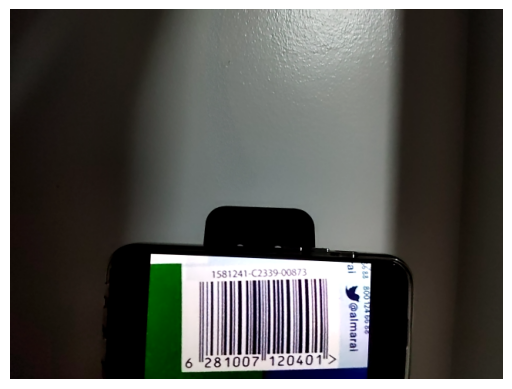

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show your QR code or barcode to the camera...
Code Detected!

Type: EAN13
Data: 6281101220762

 Searching for product info...

 Product Information:
Name: Berain Water
Brand: Unknown
Categories: en:mineral-waters
Image URL: https://images.openfoodfacts.org/images/products/628/110/122/0762/front_en.7.400.jpg
Ingredients: Not available

 Nutrition:
 - carbohydrates: 0
 - carbohydrates_100g: 0
 - carbohydrates_unit: g
 - carbohydrates_value: 0
 - energy: 0
 - energy-kcal: 0
 - energy-kcal_100g: 0
 - energy-kcal_unit: kcal
 - energy-kcal_value: 0
 - energy-kcal_value_computed: 0
 - energy_100g: 0
 - energy_unit: kcal
 - energy_value: 0
 - fat: 0
 - fat_100g: 0
 - fat_unit: g
 - fat_value: 0
 - fiber: 0
 - fiber_100g: 0
 - fiber_unit: g
 - fiber_value: 0
 - nova-group: 1
 - nova-group_100g: 1
 - nova-group_serving: 1
 - nutrition-score-fr: 0
 - nutrition-score-fr_100g: 0
 - proteins: 0
 - proteins_100g: 0
 - proteins_unit: g
 - proteins_value: 0
 - saturated-fat: 0
 - saturated-fat_100g: 0


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

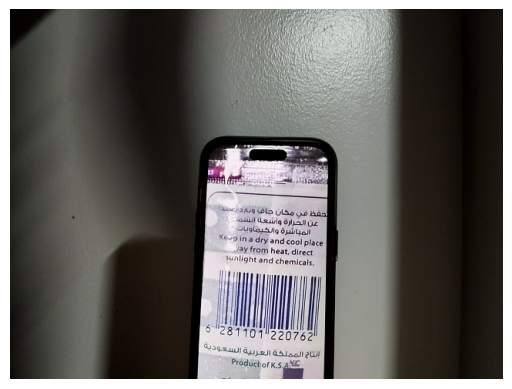

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show your QR code or barcode to the camera...
Code Detected!

Type: EAN13
Data: 5411188140887

 Searching for product info...

 Product Information:
Name: Barista vanillesmaak
Brand: Alpro
Categories: Plantaardige melken
Image URL: https://images.openfoodfacts.org/images/products/541/118/814/0887/front_nl.4.400.jpg
Ingredients: Haver - basis (67,5%) (water, haver (4,7%)), sojabasis (24,4%) (water, gepelde sojabonen (1,7%)), suiker, zonnebloe - molie, aroma's, calcium (calciumcarbonaat), zuurterege - laar (kaliumfosfaten), zeezout, vitaminen B2, D2.

 Nutrition:
 - calcium: 0.12
 - calcium_100g: 0.12
 - calcium_serving: 0.12
 - calcium_unit: g
 - calcium_value: 0.12
 - carbohydrates: 5.2
 - carbohydrates_100g: 5.2
 - carbohydrates_serving: 5.2
 - carbohydrates_unit: g
 - carbohydrates_value: 5.2
 - energy: 191
 - energy-kcal: 46
 - energy-kcal_100g: 46
 - energy-kcal_serving: 46
 - energy-kcal_unit: kcal
 - energy-kcal_value: 46
 - energy-kcal_value_computed: 45.4
 - energy-kj: 191
 - e

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

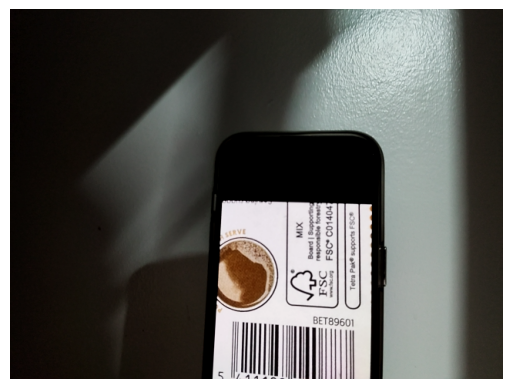

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show your QR code or barcode to the camera...
Code Detected!

Type: EAN13
Data: 3608580103325

 Searching for product info...

 Product Information:
Name: Unknown
Brand: Andros
Categories: Unknown
Image URL: https://images.openfoodfacts.org/images/products/360/858/010/3325/front_fr.3.400.jpg
Ingredients: Not available


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

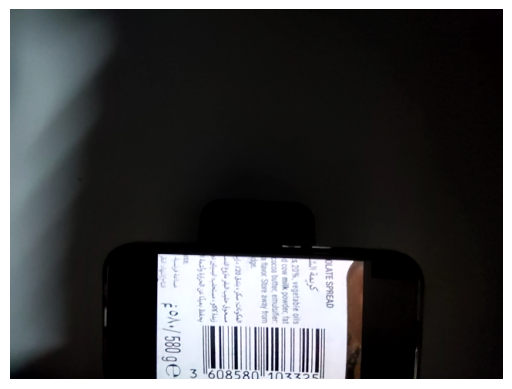

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show your QR code or barcode to the camera...
Code Detected!

Type: EAN13
Data: 3073781190885

 Searching for product info...

 Product Information:
Name: Kiri Fresh Cream & Milk
Brand: Kiri
Categories: en:cheeses
Image URL: https://images.openfoodfacts.org/images/products/307/378/119/0885/front_fr.11.400.jpg
Ingredients: Not available

 Nutrition:
 - carbohydrates: 2.5
 - carbohydrates_100g: 2.5
 - carbohydrates_unit: g
 - carbohydrates_value: 2.5
 - energy: 1293
 - energy-kcal: 309
 - energy-kcal_100g: 309
 - energy-kcal_unit: kcal
 - energy-kcal_value: 309
 - energy-kcal_value_computed: 309
 - energy_100g: 1293
 - energy_unit: kcal
 - energy_value: 309
 - fat: 29
 - fat_100g: 29
 - fat_unit: g
 - fat_value: 29
 - nutrition-score-fr: 17
 - nutrition-score-fr_100g: 17
 - proteins: 9.5
 - proteins_100g: 9.5
 - proteins_unit: g
 - proteins_value: 9.5
 - salt: 1.5
 - salt_100g: 1.5
 - salt_unit: g
 - salt_value: 1.5
 - saturated-fat: 19.5
 - saturated-fat_100g: 19.5
 - saturated-fat_unit

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

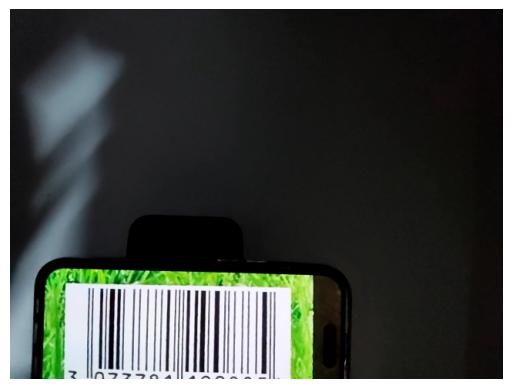

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show your QR code or barcode to the camera...
Code Detected!

Type: EAN8
Data: 80177609

 Searching for product info...

 Product Information:
Name: Kinder Chocolate
Brand: Kinder
Categories: Snacks,Snacks sucrés,Cacao et dérivés,Confiseries,Confiseries chocolatées,Barres,Barres chocolatées,Barres chocolatées au lait
Image URL: https://images.openfoodfacts.org/images/products/000/008/017/7609/front_en.345.400.jpg
Ingredients: milk  chocolate 40% (sugar, whole  milk  powder, cocoa butter, cocoa mass, emulsifier: lecithins ( soy ), flavouring: vanillin), sugar, skim  milk  powder, vegatable oil ( palm *), anhydrous milkfat ( milk ), emulsifier (lecithins) ( soy ), flavouring (vanillin),

 Nutrition:
 - carbohydrates: 53.5
 - carbohydrates_100g: 53.5
 - carbohydrates_serving: 6.69
 - carbohydrates_unit: g
 - carbohydrates_value: 53.5
 - carbon-footprint-from-known-ingredients_100g: 236
 - carbon-footprint-from-known-ingredients_product: 118
 - carbon-footprint-from-known-ingredients_servi

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

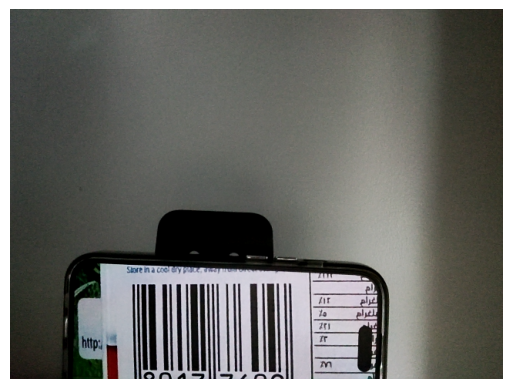

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show your QR code or barcode to the camera...
Code Detected!

Type: EAN13
Data: 8410376023831

 Searching for product info...

 Product Information:
Name: Digestive zero sin azúcares
Brand: Gullón
Categories: Botanas,Snacks dulces,Galletas y pasteles,Galletas
Image URL: https://images.openfoodfacts.org/images/products/841/037/602/3831/front_en.74.400.jpg
Ingredients: harina integral de _trigo_ 65,5%, edulcorantes (isomalt, maltitol), aceite vegetal (girasol alto oleico) 15,5%, fibra vegetal, gasificantes (carbonato ácido de sodio y de amonio), sal,

 Nutrition:
 - carbohydrates: 68
 - carbohydrates_100g: 68
 - carbohydrates_serving: 272
 - carbohydrates_unit: g
 - carbohydrates_value: 68
 - carbon-footprint-from-known-ingredients_100g: 78.6
 - carbon-footprint-from-known-ingredients_product: 314
 - carbon-footprint-from-known-ingredients_serving: 314
 - energy: 1799
 - energy-kcal: 430
 - energy-kcal_100g: 430
 - energy-kcal_serving: 1720
 - energy-kcal_unit: kcal
 - energy-kcal_value:

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

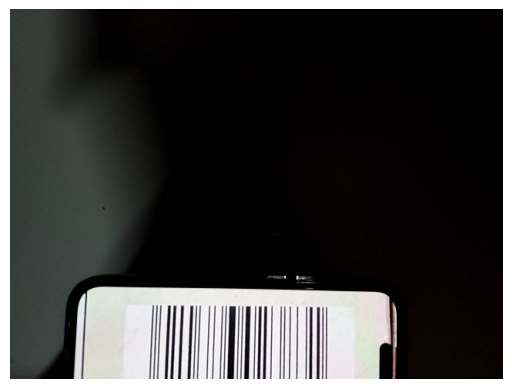

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show your QR code or barcode to the camera...
Code Detected!

Type: QRCODE
Data: http://l.ead.me/barOVP

 QR Code Content:
http://l.ead.me/barOVP


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

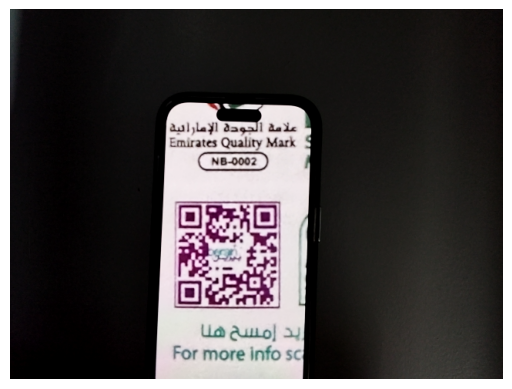

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show your QR code or barcode to the camera...
 No QR or Barcode found.


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

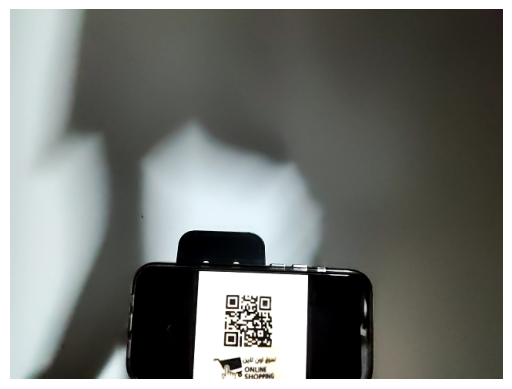

In [ ]:
print("Show your QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

Show youre QR code or barcode to the camera...
Code Detected!

Type: QRCODE
Data: http://chaizup.com/

 QR Code Content:
http://chaizup.com/


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

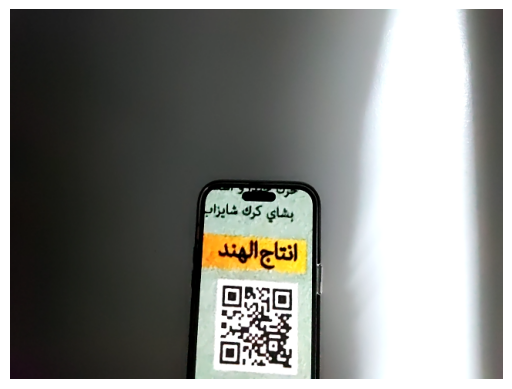

In [ ]:
print("Show youre QR code or barcode to the camera...")
img = take_photo()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # If it is a QR CODE
        if code_type == "QRCODE":
            print("\n QR Code Content:")
            print(code_data)

        # If it is BARCODE → call API
        else:
            print("\n Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                nutrients = product["nutrients"]
                if nutrients:
                    print("\n Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print(" Product not found in OpenFoodFacts.")
else:
    print(" No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")

In [ ]:
# ==========================================
# 1. SETUP & IMPORTS
# ==========================================
!pip install pyzbar
!apt-get install -y libzbar0
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode
import requests

In [ ]:
# ==========================================
# 2. HELPER FUNCTIONS
# ==========================================

def take_photo(filename='photo.jpg', quality=0.8):
  """
  Captures a photo from the user's webcam using JavaScript.
  This is required because Google Colab runs on a remote server
  and cannot access the local webcam directly via Python.
  """
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])

  # Decode the image as a NumPy array for OpenCV
  img = cv2.imdecode(np.frombuffer(binary, np.uint8), -1)
  return img

def get_product_info(barcode_number):
    """
    Queries the Open Food Facts API to retrieve product metadata.
    Args:
        barcode_number (str): The scanned EAN-13 or UPC barcode.
    Returns:
        None (Prints data directly)
    """
    url = f"https://world.openfoodfacts.org/api/v0/product/{barcode_number}.json"

    try:
        response = requests.get(url)
        data = response.json()

        # Check if product exists in the database
        if data.get('status') == 1:
            product = data['product']
            print("\n" + "="*40)
            print(f" PRODUCT DETECTED: {product.get('product_name', 'Unknown Name')}")
            print(f" Brand: {product.get('brands', 'Unknown Brand')}")
            print("-" * 20)

            # Extract Nutritional Info
            nutrients = product.get('nutriments', {})
            print(f" Energy: {nutrients.get('energy-kcal_100g', 'N/A')} kcal/100g")
            print(f" Sugars: {nutrients.get('sugars_100g', 'N/A')} g")
            print(f" Proteins: {nutrients.get('proteins_100g', 'N/A')} g")
            print("="*40 + "\n")
        else:
            print(f"\n Product not found in Open Food Facts database (Code: {barcode_number})")

    except Exception as e:
        print(f"API Connection Error: {e}")

Please click 'Capture' to scan...


<IPython.core.display.Javascript object>

Detected EAN13: 6281101220762

 PRODUCT DETECTED: Berain Water
 Brand: Unknown Brand
--------------------
 Energy: 0 kcal/100g
 Sugars: 0 g
 Proteins: 0 g



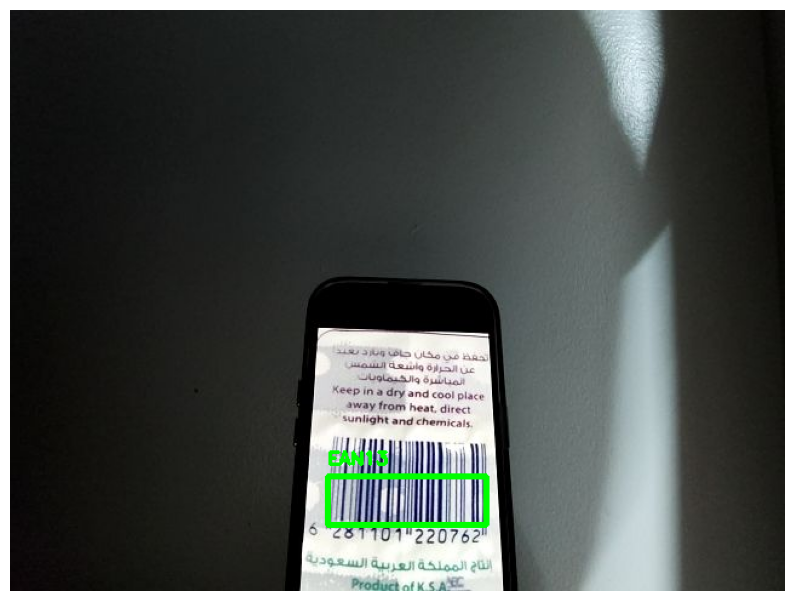

In [ ]:
# ==========================================
# 3. MAIN EXECUTION LOOP
# ==========================================

try:
  # 1. Capture the image
  print("Please click 'Capture' to scan...")
  img = take_photo()

  # 2. Preprocess: Convert to Grayscale for better detection
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  # 3. Decode: Find barcodes/QR codes
  detected_codes = decode(gray)

  if not detected_codes:
      print("No Code Detected. Please try again with better lighting.")

  for code in detected_codes:
      # Decode bytes to string
      code_data = code.data.decode('utf-8')
      code_type = code.type

      print(f"Detected {code_type}: {code_data}")

      # 4. Logic: If it is a QR code, show link. If Barcode, fetch Product Data.
      if code_type == 'QRCODE':
          print(f"Link/Data: {code_data}")
      else:
          # Assume it's a product barcode (EAN13, UPC, etc.)
          get_product_info(code_data)

      # Draw a rectangle around the code
      (x, y, w, h) = code.rect
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
      cv2.putText(img, f"{code_type}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

  # 5. Show the final result
  plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

except Exception as e:
  print(f"An error occurred: {str(e)}")

Please click 'Capture' to scan...


<IPython.core.display.Javascript object>

Detected QRCODE: http://l.ead.me/barOVP
Link/Data: http://l.ead.me/barOVP


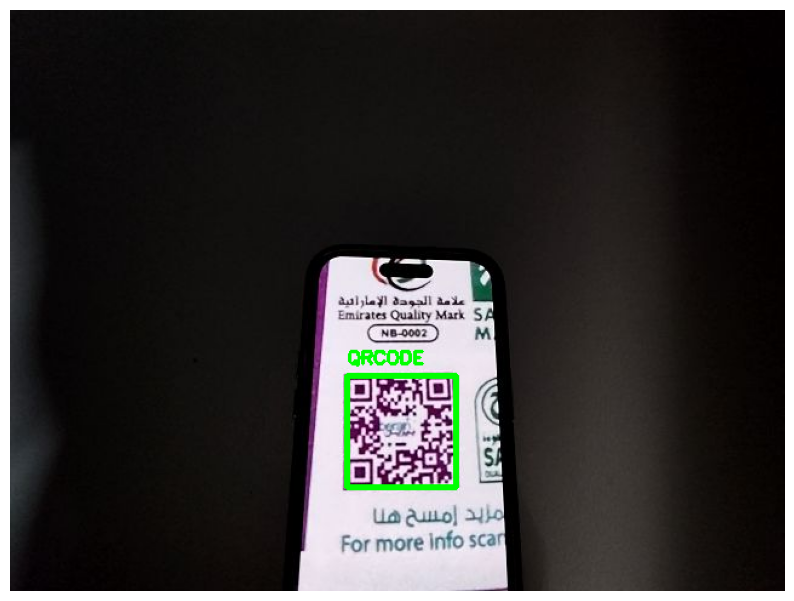

In [ ]:
# ==========================================
# 3. MAIN EXECUTION LOOP
# ==========================================

try:
  # 1. Capture the image
  print("Please click 'Capture' to scan...")
  img = take_photo()

  # 2. Preprocess: Convert to Grayscale for better detection
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  # 3. Decode: Find barcodes/QR codes
  detected_codes = decode(gray)

  if not detected_codes:
      print("No Code Detected. Please try again with better lighting.")

  for code in detected_codes:
      # Decode bytes to string
      code_data = code.data.decode('utf-8')
      code_type = code.type

      print(f"Detected {code_type}: {code_data}")

      # 4. Logic: If it is a QR code, show link. If Barcode, fetch Product Data.
      if code_type == 'QRCODE':
          print(f"Link/Data: {code_data}")
      else:
          # Assume it's a product barcode (EAN13, UPC, etc.)
          get_product_info(code_data)

      # Draw a rectangle around the code
      (x, y, w, h) = code.rect
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
      cv2.putText(img, f"{code_type}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

  # 5. Show the final result
  plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

except Exception as e:
  print(f"An error occurred: {str(e)}")

Please click 'Capture' to scan...


<IPython.core.display.Javascript object>

Detected EAN13: 5411188140887

 PRODUCT DETECTED: Barista vanillesmaak
 Brand: Alpro
--------------------
 Energy: 46 kcal/100g
 Sugars: 4.5 g
 Proteins: 0.7 g



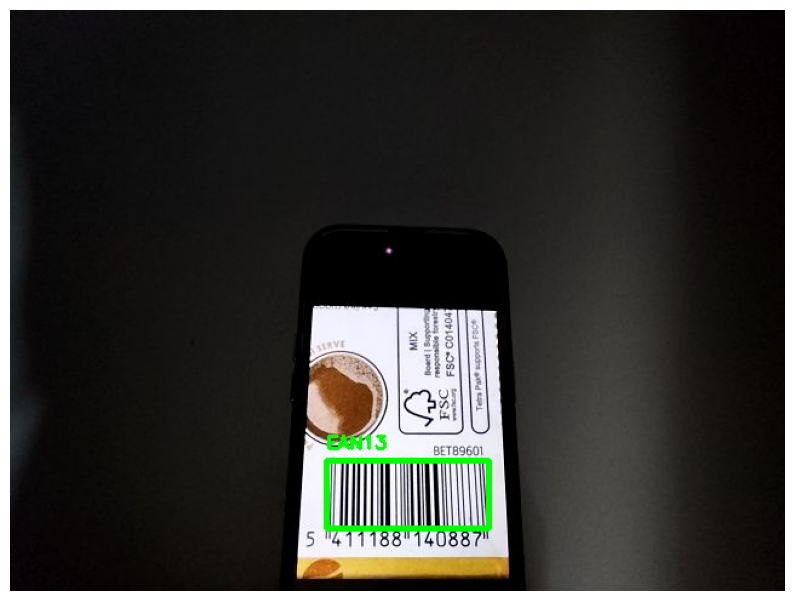

In [ ]:
# ==========================================
# 3. MAIN EXECUTION LOOP
# ==========================================

try:
  # 1. Capture the image
  print("Please click 'Capture' to scan...")
  img = take_photo()

  # 2. Preprocess: Convert to Grayscale for better detection
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  # 3. Decode: Find barcodes/QR codes
  detected_codes = decode(gray)

  if not detected_codes:
      print("No Code Detected. Please try again with better lighting.")

  for code in detected_codes:
      # Decode bytes to string
      code_data = code.data.decode('utf-8')
      code_type = code.type

      print(f"Detected {code_type}: {code_data}")

      # 4. Logic: If it is a QR code, show link. If Barcode, fetch Product Data.
      if code_type == 'QRCODE':
          print(f"Link/Data: {code_data}")
      else:
          # Assume it's a product barcode (EAN13, UPC, etc.)
          get_product_info(code_data)

      # Draw a rectangle around the code
      (x, y, w, h) = code.rect
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
      cv2.putText(img, f"{code_type}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

  # 5. Show the final result
  plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

except Exception as e:
  print(f"An error occurred: {str(e)}")

Please click 'Capture' to scan...


<IPython.core.display.Javascript object>

Detected QRCODE: http://chaizup.com/
Link/Data: http://chaizup.com/


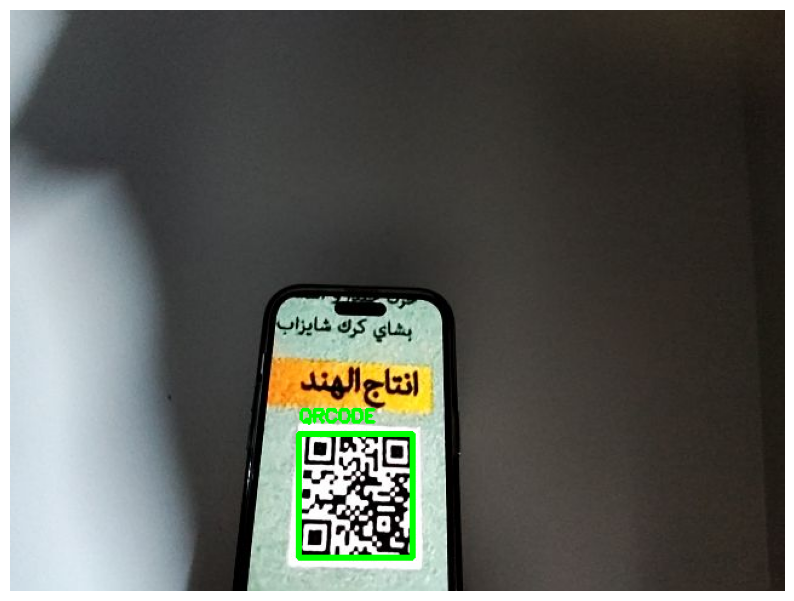

In [ ]:
# ==========================================
# 3. MAIN EXECUTION LOOP
# ==========================================

try:
  # 1. Capture the image
  print("Please click 'Capture' to scan...")
  img = take_photo()

  # 2. Preprocess: Convert to Grayscale for better detection
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  # 3. Decode: Find barcodes/QR codes
  detected_codes = decode(gray)

  if not detected_codes:
      print("No Code Detected. Please try again with better lighting.")

  for code in detected_codes:
      # Decode bytes to string
      code_data = code.data.decode('utf-8')
      code_type = code.type

      print(f"Detected {code_type}: {code_data}")

      # 4. Logic: If it is a QR code, show link. If Barcode, fetch Product Data.
      if code_type == 'QRCODE':
          print(f"Link/Data: {code_data}")
      else:
          # Assume it's a product barcode (EAN13, UPC, etc.)
          get_product_info(code_data)

      # Draw a rectangle around the code
      (x, y, w, h) = code.rect
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
      cv2.putText(img, f"{code_type}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

  # 5. Show the final result
  plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

except Exception as e:
  print(f"An error occurred: {str(e)}")

Code Explanation

The code consists of four main functional blocks designed to capture an image, detect a barcode or QR code, and retrieve information associated with it.
1. Environment Setup & Dependencies
 * Installation: The code begins by installing pyzbar, a Python library used for reading barcodes and QR codes, and libzbar0, the underlying system library required for it to work.
2. Imports and Camera Configuration
 * Libraries: It imports essential libraries such as cv2 (OpenCV) for image processing, numpy for handling image arrays, requests for making API calls to the internet, and matplotlib for displaying the final image.
 * take_photo() Function: Since this is running in a notebook environment (like Google Colab), direct access to the webcam is handled via JavaScript. This function runs a script to open the camera stream, capture a frame, and convert the image data into a format Python can use (a NumPy array).
3. Product Data Retrieval (The "Database" Logic)
 * get_product_info(barcode_number): This function acts as the interface to the data source.
   * It constructs a URL using the scanned barcode number to query the Open Food Facts API.
   * It sends a web request and parses the JSON response. If the product is found (status == 1), it extracts specific details: Product Name, Brand, Categories, Image URL, Ingredients, and Nutrients.
4. Main Execution Flow
 * Capture: It calls take_photo() to get a live image from the user.
 * Processing: The image is converted to grayscale (cv2.COLOR_RGB2GRAY) to make barcode detection more accurate and faster.
 * Decoding: The decode() function scans the image for any barcodes or QR codes.
 * Logic:
   * If a code is found, it checks the type.
   * QR Codes: It simply prints the raw content (e.g., a website link).
   * Barcodes: It uses the barcode number to call get_product_info and prints the nutritional data and product details fetched from the internet.
 * Visualization: Finally, it displays the captured image with the detected code.